# **0. Install [MNE](https://mne.tools) and Import It**

In [1]:
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 36.9 MB/s eta 0:00:00


# **1. Import a DataSet and Start Working on It**

In [2]:
# Download and Save a Sample Dataset
file_name = mne.datasets.sample.data_path(download=True, path='./')

100%|██████████████████████████████████████| 1.65G/1.65G [00:00<00:00, 718GB/s]
Untarring contents of '/content/MNE-sample-data-processed.tar.gz' to '/content/.'


Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 04m40s (1576.2 MB)


In [3]:
!ls MNE-sample-data/MEG/sample

all-trans.fif				    sample_audvis_eog-proj.fif
audvis.ave				    sample_audvis_filt-0-40_raw-eve.fif
audvis.cov				    sample_audvis_filt-0-40_raw.fif
ernoise_bads.bad			    sample_audvis-grad-oct-6-fwd-sensmap-2-lh.w
ernoise.cov				    sample_audvis-grad-oct-6-fwd-sensmap-2-rh.w
ernoise-cov.fif				    sample_audvis-grad-oct-6-fwd-sensmap-lh.w
ernoise_raw-eve.fif			    sample_audvis-grad-oct-6-fwd-sensmap-rh.w
ernoise_raw.fif				    sample_audvis-grad-vol-7-fwd-sensmap-vol.w
fsaverage_audvis-eeg-lh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-3-lh.w
fsaverage_audvis-eeg-rh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-3-rh.w
fsaverage_audvis-meg-eeg-lh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-lh.w
fsaverage_audvis-meg-eeg-rh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-rh.w
fsaverage_audvis-meg-lh.stc		    sample_audvis-meg-eeg-lh.stc
fsaverage_audvis-meg-rh.stc		    sample_audvis-meg-eeg-oct-6-fwd.fif
labels					    sample_audvis-meg-eeg-oct-6-meg-eeg-diagnoise-inv.fif
sample_audv

In [4]:
# Main File Path
Path = "MNE-sample-data/MEG/sample/sample_audvis_raw.fif"

# Load Data
raw = mne.io.read_raw(Path, preload=True, verbose=False)

In [5]:
raw

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

In [6]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [7]:
raw.info['sfreq']

600.614990234375

Using matplotlib as 2D backend.


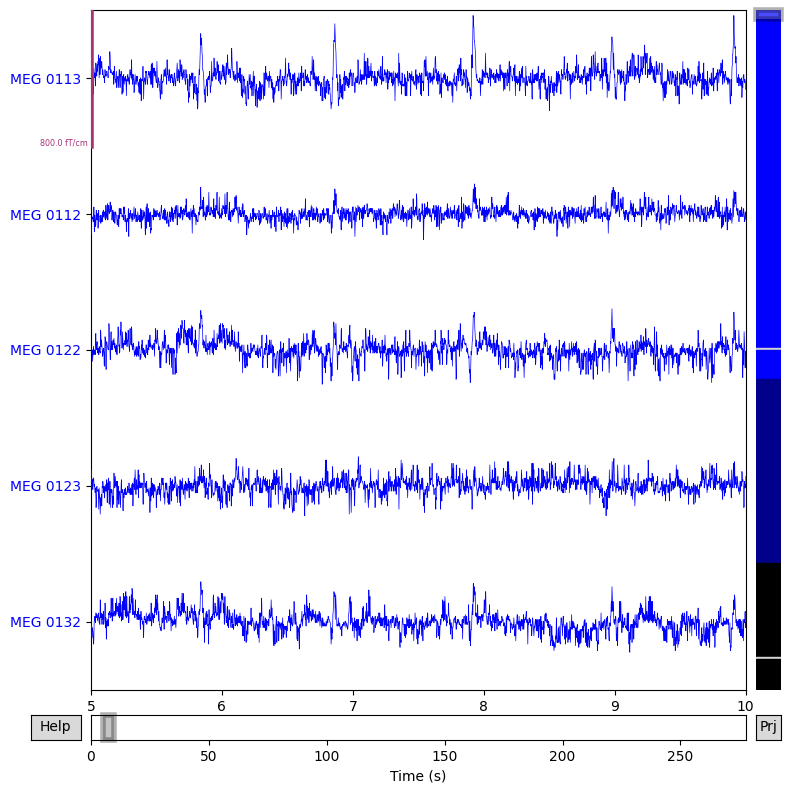

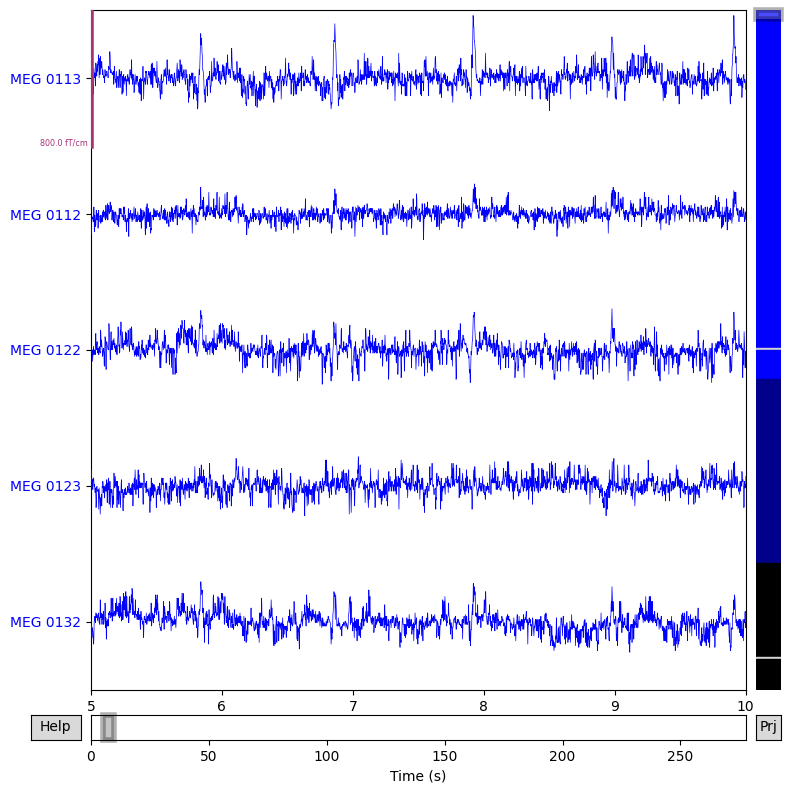

In [8]:
raw.plot(duration=5, start=5, n_channels=5)

## **1.1 Manual Manipulation of Data**

In [9]:
data = raw.get_data()
data

array([[ 9.64355481e-12,  0.00000000e+00,  0.00000000e+00, ...,
        -1.92871096e-12,  2.89306644e-12,  3.85742192e-12],
       [-4.82177740e-12, -2.89306644e-12, -9.64355481e-13, ...,
        -9.64355481e-13, -9.64355481e-13, -1.92871096e-12],
       [ 1.01074222e-13,  6.31713890e-14,  7.58056668e-14, ...,
        -4.80102556e-13, -6.06445334e-13, -5.93811056e-13],
       ...,
       [ 3.88542173e-05,  4.07510373e-05,  4.09957883e-05, ...,
         6.72453304e-05,  6.68782039e-05,  6.91421504e-05],
       [ 6.58391126e-05,  6.80025648e-05,  6.81779798e-05, ...,
         8.51932390e-05,  8.58948991e-05,  8.89938982e-05],
       [ 2.85661012e-04,  2.83699953e-04,  2.80431520e-04, ...,
         2.64089357e-04,  2.62781984e-04,  2.57552492e-04]])

In [10]:
type(data), data.shape

(numpy.ndarray, (376, 166800))

# **2. Channel Manipulation Using MNE**

In [11]:
raw

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

In [12]:
ali = {'age':24, "gender":"male"}
ali

{'age': 24, 'gender': 'male'}

In [13]:
ali['age']

24

In [14]:
ali.keys()

dict_keys(['age', 'gender'])

In [15]:
ali.values()

dict_values([24, 'male'])

In [16]:
raw.info.keys()

dict_keys(['file_id', 'events', 'hpi_results', 'hpi_meas', 'subject_info', 'device_info', 'helium_info', 'hpi_subsystem', 'proc_history', 'meas_id', 'experimenter', 'description', 'proj_id', 'proj_name', 'meas_date', 'utc_offset', 'sfreq', 'highpass', 'lowpass', 'line_freq', 'gantry_angle', 'chs', 'dev_head_t', 'ctf_head_t', 'dev_ctf_t', 'dig', 'bads', 'ch_names', 'nchan', 'projs', 'comps', 'acq_pars', 'acq_stim', 'custom_ref_applied', 'xplotter_layout', 'kit_system_id'])

In [17]:
# Sampling Freq
fs = raw.info["sfreq"]
fs

600.614990234375

In [18]:
# Number of Channels
raw.info["nchan"]

376

In [19]:
# kind
raw.info["chs"][2]['kind']

1 (FIFFV_MEG_CH)

In [20]:
raw.info["ch_names"]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143',
 'MEG 0142',
 'MEG 0141',
 'MEG 0213',
 'MEG 0212',
 'MEG 0211',
 'MEG 0222',
 'MEG 0223',
 'MEG 0221',
 'MEG 0232',
 'MEG 0233',
 'MEG 0231',
 'MEG 0243',
 'MEG 0242',
 'MEG 0241',
 'MEG 0313',
 'MEG 0312',
 'MEG 0311',
 'MEG 0322',
 'MEG 0323',
 'MEG 0321',
 'MEG 0333',
 'MEG 0332',
 'MEG 0331',
 'MEG 0343',
 'MEG 0342',
 'MEG 0341',
 'MEG 0413',
 'MEG 0412',
 'MEG 0411',
 'MEG 0422',
 'MEG 0423',
 'MEG 0421',
 'MEG 0432',
 'MEG 0433',
 'MEG 0431',
 'MEG 0443',
 'MEG 0442',
 'MEG 0441',
 'MEG 0513',
 'MEG 0512',
 'MEG 0511',
 'MEG 0523',
 'MEG 0522',
 'MEG 0521',
 'MEG 0532',
 'MEG 0533',
 'MEG 0531',
 'MEG 0542',
 'MEG 0543',
 'MEG 0541',
 'MEG 0613',
 'MEG 0612',
 'MEG 0611',
 'MEG 0622',
 'MEG 0623',
 'MEG 0621',
 'MEG 0633',
 'MEG 0632',
 'MEG 0631',
 'MEG 0642',
 'MEG 0643',
 'MEG 0641',
 'MEG 0713',
 'MEG 0712',
 'MEG 0711',
 'MEG 0723',
 'MEG 0722',

In [21]:
for ch in raw.info["chs"]:
    print(f"{ch['ch_name']} \t {ch['kind']}")

MEG 0113 	 1 (FIFFV_MEG_CH)
MEG 0112 	 1 (FIFFV_MEG_CH)
MEG 0111 	 1 (FIFFV_MEG_CH)
MEG 0122 	 1 (FIFFV_MEG_CH)
MEG 0123 	 1 (FIFFV_MEG_CH)
MEG 0121 	 1 (FIFFV_MEG_CH)
MEG 0132 	 1 (FIFFV_MEG_CH)
MEG 0133 	 1 (FIFFV_MEG_CH)
MEG 0131 	 1 (FIFFV_MEG_CH)
MEG 0143 	 1 (FIFFV_MEG_CH)
MEG 0142 	 1 (FIFFV_MEG_CH)
MEG 0141 	 1 (FIFFV_MEG_CH)
MEG 0213 	 1 (FIFFV_MEG_CH)
MEG 0212 	 1 (FIFFV_MEG_CH)
MEG 0211 	 1 (FIFFV_MEG_CH)
MEG 0222 	 1 (FIFFV_MEG_CH)
MEG 0223 	 1 (FIFFV_MEG_CH)
MEG 0221 	 1 (FIFFV_MEG_CH)
MEG 0232 	 1 (FIFFV_MEG_CH)
MEG 0233 	 1 (FIFFV_MEG_CH)
MEG 0231 	 1 (FIFFV_MEG_CH)
MEG 0243 	 1 (FIFFV_MEG_CH)
MEG 0242 	 1 (FIFFV_MEG_CH)
MEG 0241 	 1 (FIFFV_MEG_CH)
MEG 0313 	 1 (FIFFV_MEG_CH)
MEG 0312 	 1 (FIFFV_MEG_CH)
MEG 0311 	 1 (FIFFV_MEG_CH)
MEG 0322 	 1 (FIFFV_MEG_CH)
MEG 0323 	 1 (FIFFV_MEG_CH)
MEG 0321 	 1 (FIFFV_MEG_CH)
MEG 0333 	 1 (FIFFV_MEG_CH)
MEG 0332 	 1 (FIFFV_MEG_CH)
MEG 0331 	 1 (FIFFV_MEG_CH)
MEG 0343 	 1 (FIFFV_MEG_CH)
MEG 0342 	 1 (FIFFV_MEG_CH)
MEG 0341 	 1 (FIFFV_

In [22]:
# Remove Channels
raw_copy = raw.copy()
raw_copy.drop_channels(['EOG 061', 'STI 016', 'EEG 013'])

<Raw | sample_audvis_raw.fif, 373 x 166800 (277.7 s), ~478.0 MB, data loaded>

In [23]:
for ch in raw_copy.info["chs"]:
    print(f"{ch['ch_name']} \t {ch['kind']}")

MEG 0113 	 1 (FIFFV_MEG_CH)
MEG 0112 	 1 (FIFFV_MEG_CH)
MEG 0111 	 1 (FIFFV_MEG_CH)
MEG 0122 	 1 (FIFFV_MEG_CH)
MEG 0123 	 1 (FIFFV_MEG_CH)
MEG 0121 	 1 (FIFFV_MEG_CH)
MEG 0132 	 1 (FIFFV_MEG_CH)
MEG 0133 	 1 (FIFFV_MEG_CH)
MEG 0131 	 1 (FIFFV_MEG_CH)
MEG 0143 	 1 (FIFFV_MEG_CH)
MEG 0142 	 1 (FIFFV_MEG_CH)
MEG 0141 	 1 (FIFFV_MEG_CH)
MEG 0213 	 1 (FIFFV_MEG_CH)
MEG 0212 	 1 (FIFFV_MEG_CH)
MEG 0211 	 1 (FIFFV_MEG_CH)
MEG 0222 	 1 (FIFFV_MEG_CH)
MEG 0223 	 1 (FIFFV_MEG_CH)
MEG 0221 	 1 (FIFFV_MEG_CH)
MEG 0232 	 1 (FIFFV_MEG_CH)
MEG 0233 	 1 (FIFFV_MEG_CH)
MEG 0231 	 1 (FIFFV_MEG_CH)
MEG 0243 	 1 (FIFFV_MEG_CH)
MEG 0242 	 1 (FIFFV_MEG_CH)
MEG 0241 	 1 (FIFFV_MEG_CH)
MEG 0313 	 1 (FIFFV_MEG_CH)
MEG 0312 	 1 (FIFFV_MEG_CH)
MEG 0311 	 1 (FIFFV_MEG_CH)
MEG 0322 	 1 (FIFFV_MEG_CH)
MEG 0323 	 1 (FIFFV_MEG_CH)
MEG 0321 	 1 (FIFFV_MEG_CH)
MEG 0333 	 1 (FIFFV_MEG_CH)
MEG 0332 	 1 (FIFFV_MEG_CH)
MEG 0331 	 1 (FIFFV_MEG_CH)
MEG 0343 	 1 (FIFFV_MEG_CH)
MEG 0342 	 1 (FIFFV_MEG_CH)
MEG 0341 	 1 (FIFFV_

In [24]:
# Pick Some Specific Channels
raw_copy2 = raw.copy()

channel_list = [("EEG " + str(i).zfill(3)) for i in range(1, 61)]
raw_copy2.pick_channels(channel_list)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<Raw | sample_audvis_raw.fif, 60 x 166800 (277.7 s), ~79.3 MB, data loaded>

In [25]:
raw_copy3 = raw.copy().pick_types(eeg=True, meg=True, eog=False)

raw_copy3

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<Raw | sample_audvis_raw.fif, 364 x 166800 (277.7 s), ~466.5 MB, data loaded>

# **3. Montages and Sensor Locations**

In [26]:
# List of Available Montages
builtin_montages = mne.channels.get_builtin_montages(descriptions=True)

for montage_name, montage_description in builtin_montages:
    print(f"{montage_name}: \t {montage_description}")

standard_1005: 	 Electrodes are named and positioned according to the international 10-05 system (343+3 locations)
standard_1020: 	 Electrodes are named and positioned according to the international 10-20 system (94+3 locations)
standard_alphabetic: 	 Electrodes are named with LETTER-NUMBER combinations (A1, B2, F4, …) (65+3 locations)
standard_postfixed: 	 Electrodes are named according to the international 10-20 system using postfixes for intermediate positions (100+3 locations)
standard_prefixed: 	 Electrodes are named according to the international 10-20 system using prefixes for intermediate positions (74+3 locations)
standard_primed: 	 Electrodes are named according to the international 10-20 system using prime marks (' and '') for intermediate positions (100+3 locations)
biosemi16: 	 BioSemi cap with 16 electrodes (16+3 locations)
biosemi32: 	 BioSemi cap with 32 electrodes (32+3 locations)
biosemi64: 	 BioSemi cap with 64 electrodes (64+3 locations)
biosemi128: 	 BioSemi cap wi

In [27]:
# Create Sample EEG Cap Montage
easycap_montage = mne.channels.make_standard_montage("easycap-M1")
print(easycap_montage)

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 74 channels>


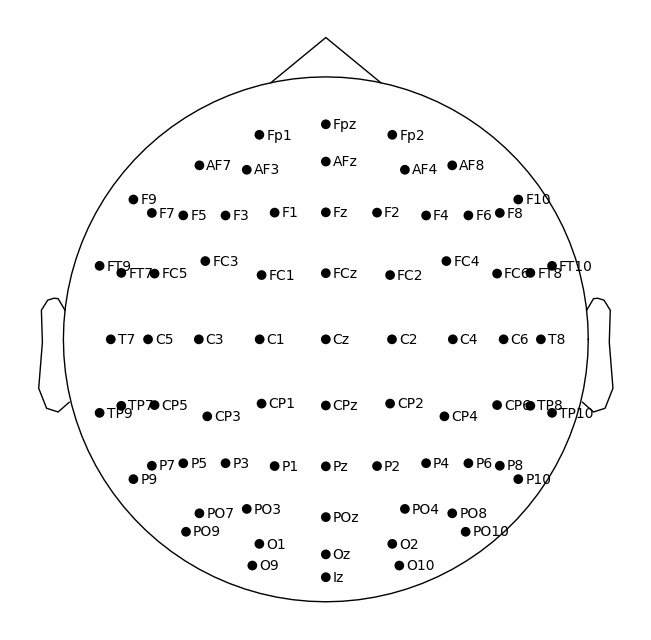

In [28]:
# Use Montage Plot Methods for Plotting
easycap_montage.plot();  # 2D

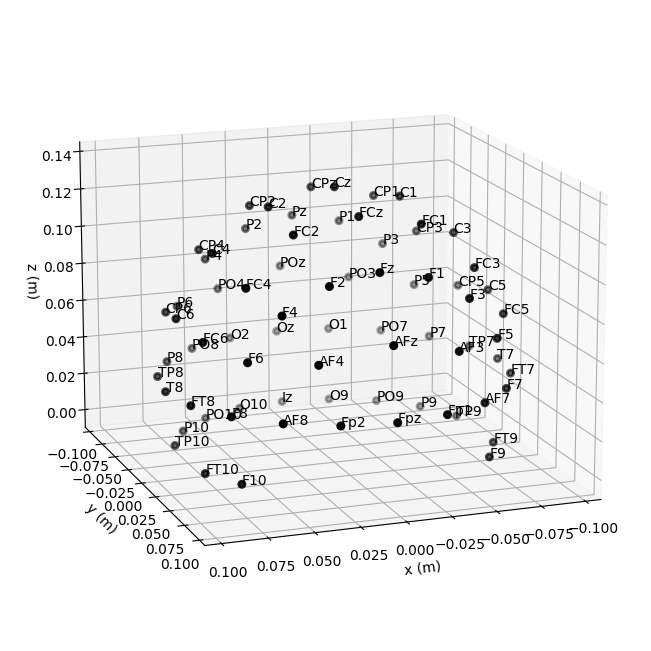

In [29]:
# How About 3D
fig = easycap_montage.plot(kind="3d", show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial

## **3.1 Read New Data Set, Specify Montage and Plot**

In [30]:
# Read SSVEP Sample DataSet
ssvep_path = mne.datasets.ssvep.data_path(download=True, path='./')
file_path = "ssvep-example-data/sub-02/ses-01/eeg/sub-02_ses-01_task-ssvep_eeg.vhdr"

ssvep_raw = mne.io.read_raw_brainvision(file_path, verbose=False, preload=True)

100%|█████████████████████████████████████| 39.5M/39.5M [00:00<00:00, 5.42GB/s]
Unzipping contents of '/content/ssvep_example_data.zip' to '/content/.'


Download complete in 05s (37.7 MB)


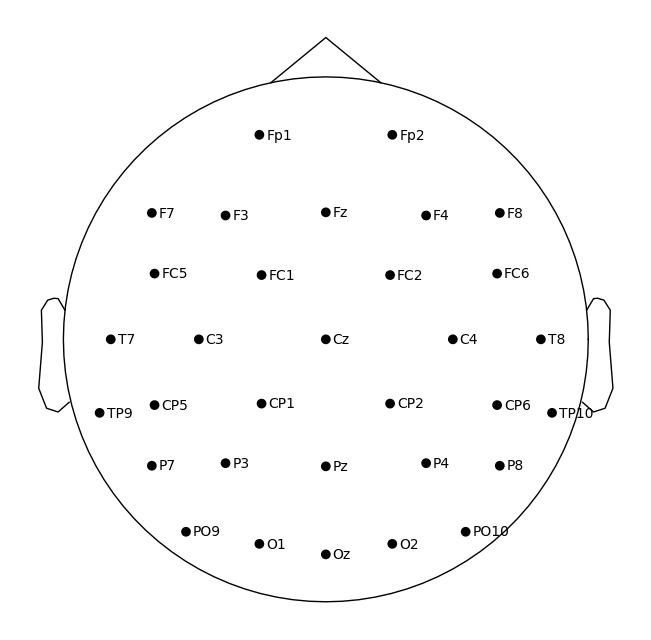

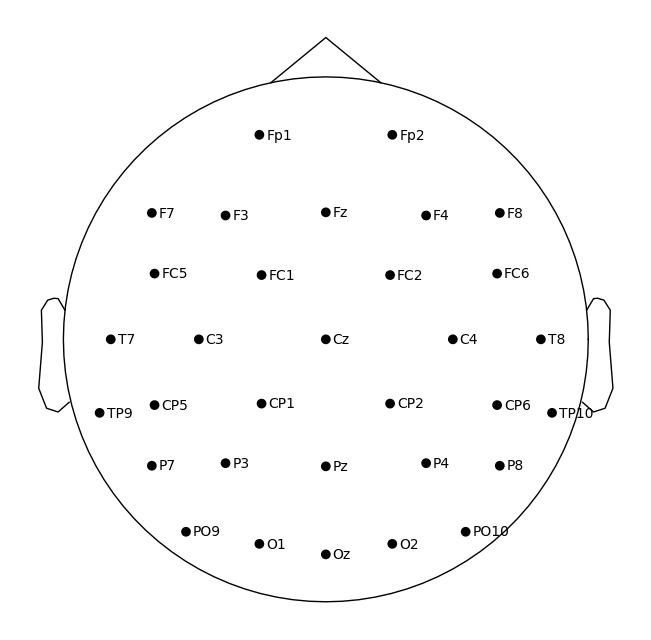

In [31]:
# Use the Preloaded Montage

ssvep_raw.set_montage(easycap_montage)
# ssvep_raw.set_montage("easycap-M1")          # Apply a template montage directly, without preloading

# Plot
ssvep_raw.plot_sensors(show_names=True, kind="topomap")

# **4. Preprocessing**

## **4.1 Filtering Data**

### **4.1.1 Analyzing Spectrum Density Plot of the Data**

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


<ipython-input-32-8489589c5e93>:6: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  ssvep_copy.plot_psd(fmin=0, fmax=100);


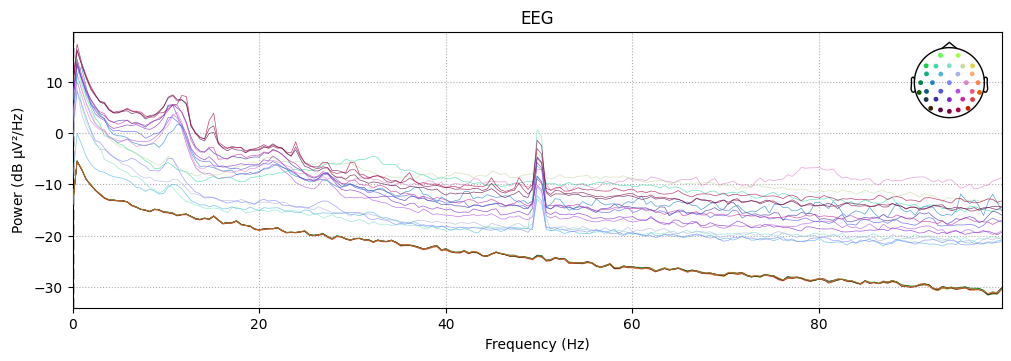

In [32]:
import numpy as np

ssvep_copy = ssvep_raw.copy().pick_types(eeg=True)

# Plot Power Spectrum Density Plot
ssvep_copy.plot_psd(fmin=0, fmax=100);

In [33]:
ssvep_copy.info['sfreq']

1000.0

### **4.1.2 50 Hz Notch Filter for Power Noise Elimination**

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.5s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


<ipython-input-34-3e8f528a10e1>:4: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  ssvep_copy.plot_psd(fmin=0, fmax=100);


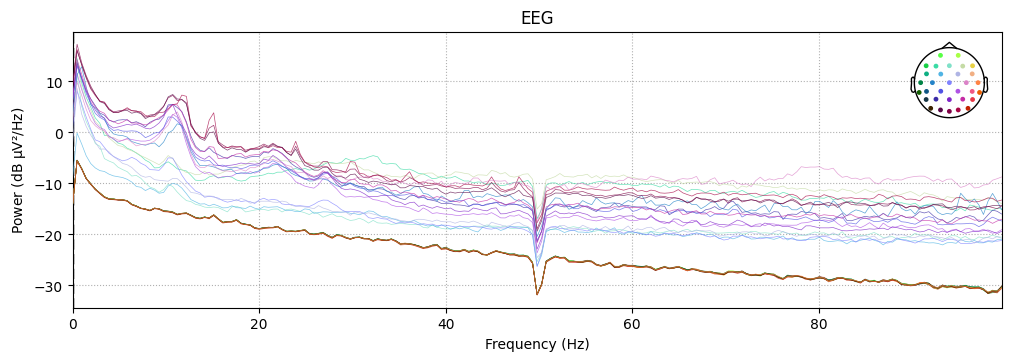

In [34]:
ssvep_copy.notch_filter(50)

# Plot Power Spectrum Density Plot
ssvep_copy.plot_psd(fmin=0, fmax=100);

### **4.1.3 Frequency Band Seperation**

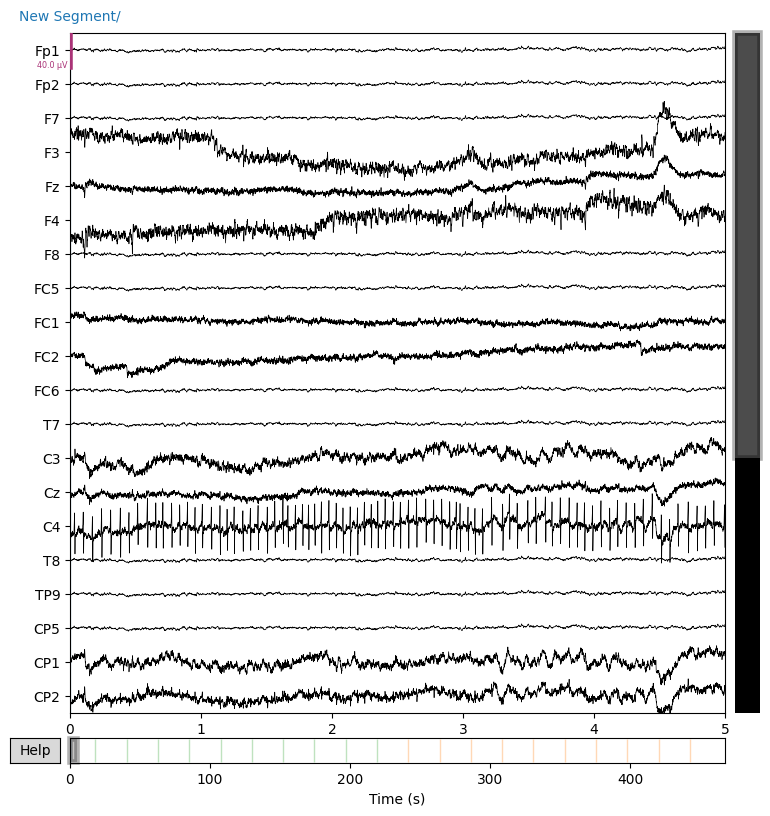

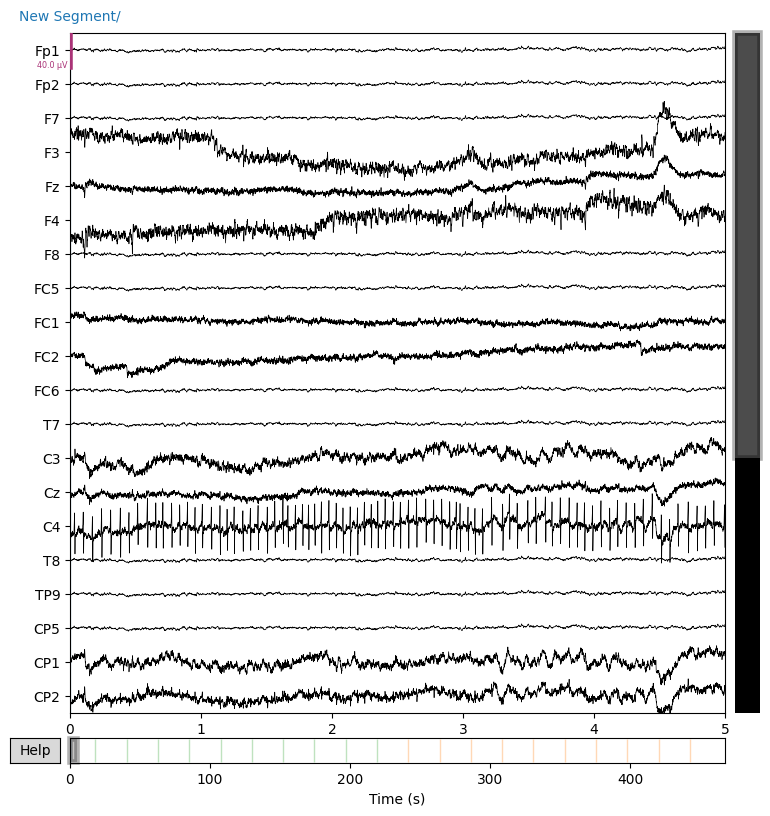

In [35]:
ssvep_copy.plot(start=0, duration=5)

In [36]:
# Apply Band-Pass Filter
r_start, r_end = 4, 20                  # Desired Freq Band
ssvep_copy.filter(l_freq=r_start, h_freq=r_end)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1651 samples (1.651 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


<RawBrainVision | sub-02_ses-01_task-ssvep_eeg.eeg, 32 x 467580 (467.6 s), ~114.2 MB, data loaded>

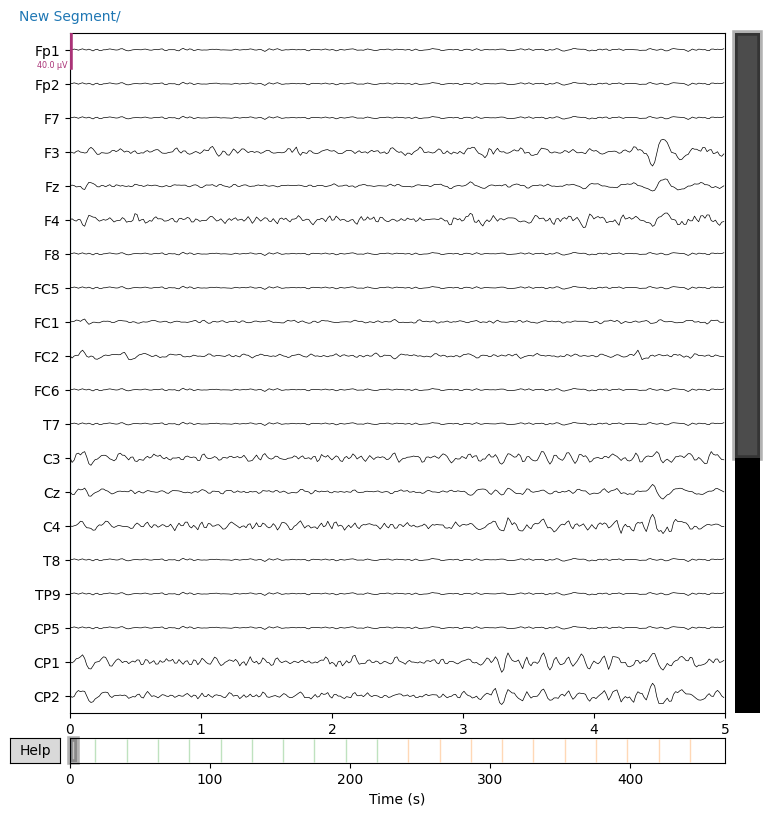

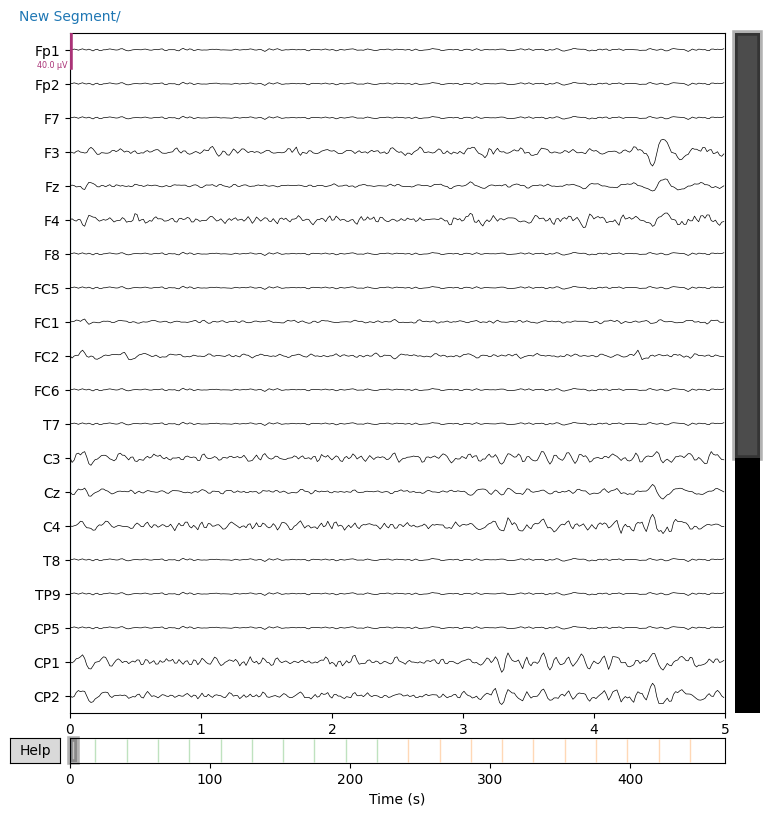

In [37]:
ssvep_copy.plot(start=0, duration=5)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


<ipython-input-38-b06fa6f81fc4>:5: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  ssvep_copy.plot_psd(fmin=0, fmax=40, ax=ax, show=False)


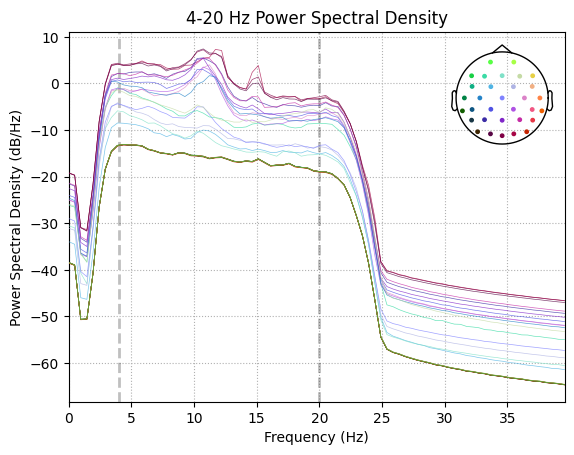

In [38]:
import matplotlib.pyplot as plt

# Plot the power spectral density (PSD) of EEG data in the alpha band
fig, ax = plt.subplots()
ssvep_copy.plot_psd(fmin=0, fmax=40, ax=ax, show=False)
ax.set_title('4-20 Hz Power Spectral Density')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (dB/Hz)')
plt.show()

### **4.1.4 Filter Function as a Friend**

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Filter length: 441 samples (0.441 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


<ipython-input-39-eb3ffb6d9eef>:8: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  ssvep_copy2.plot_psd(fmin=0, fmax=100, ax=ax)


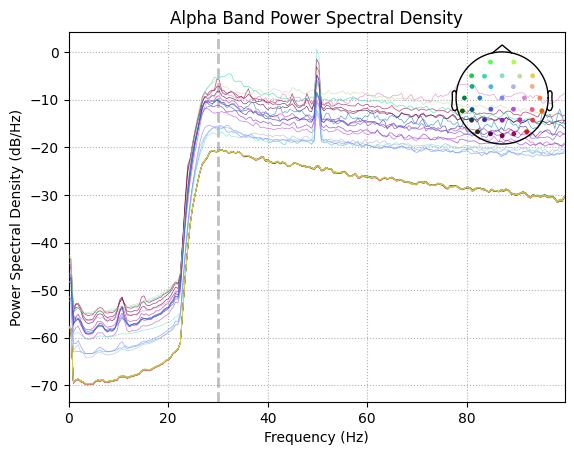

In [39]:
ssvep_copy2 = ssvep_raw.copy().pick_types(eeg=True)

# Remove All Data with Freq Higher Than 30 Hz
ssvep_copy2 = ssvep_copy2.filter(l_freq=30, h_freq=None)

# Plot
fig, ax = plt.subplots()
ssvep_copy2.plot_psd(fmin=0, fmax=100, ax=ax)
ax.set_title('Alpha Band Power Spectral Density')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Power Spectral Density (dB/Hz)')
plt.show()

## **4.2 Referencing**

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


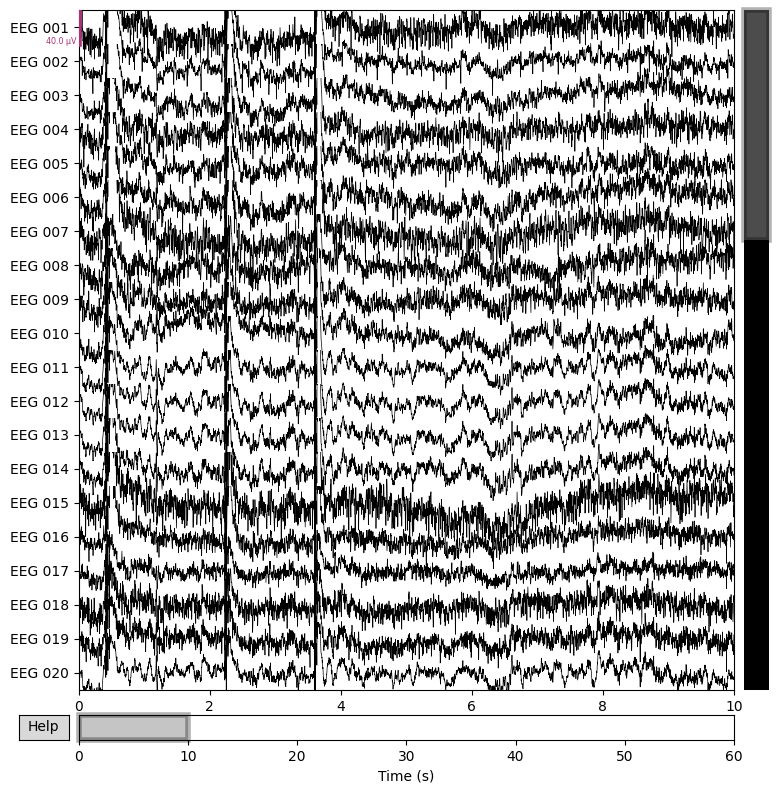

In [40]:
# Get a Fresh Copy of the Data
raw_copy5 = raw.copy()
raw_copy5.crop(tmax=60).load_data().pick_types(eeg=True)

raw_copy5.plot();

### **4.2.1 Average Referencing**

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


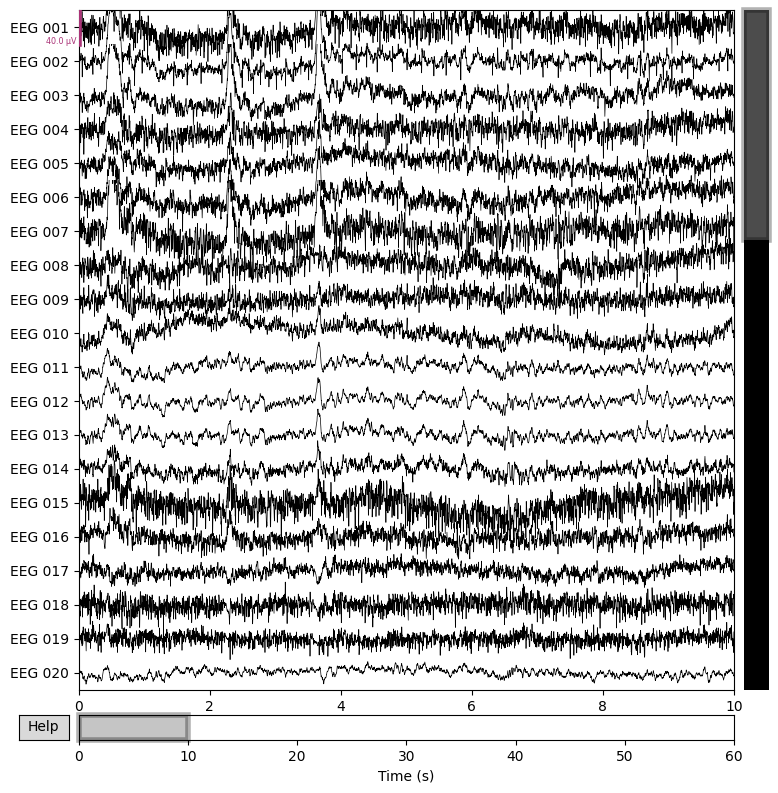

In [41]:
# Setting a Reference Channel/Type
raw_copy5.set_eeg_reference('average')

# Plot EEG Data After Referencing
raw_copy5.plot();

### **4.2.1 Channel Referencing**

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


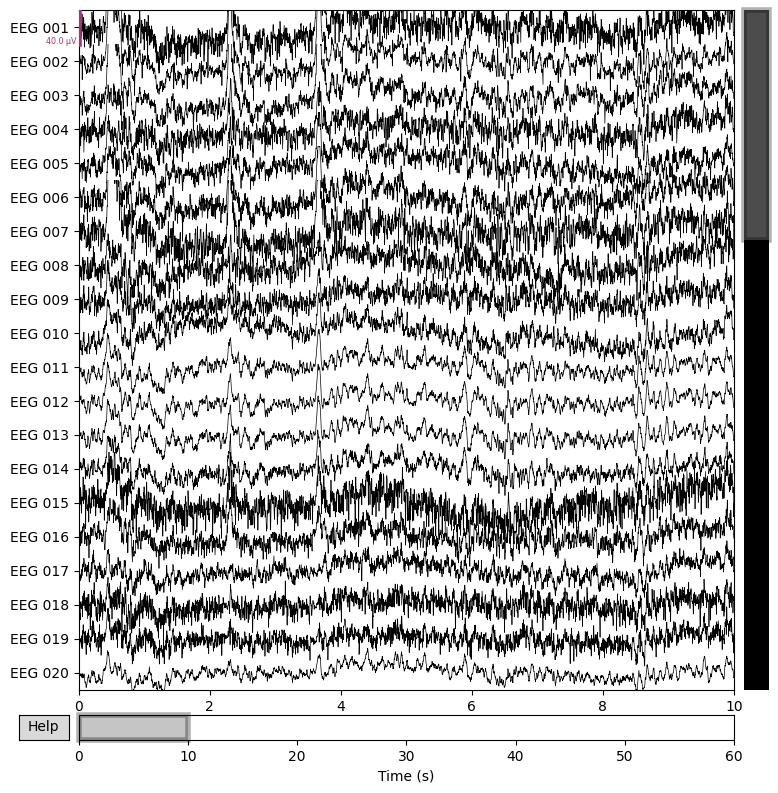

In [42]:
# How About a Channel as a Reference?
raw_copy5.set_eeg_reference(ref_channels=["EEG 050"])

raw_copy5.plot();

# **5. Working with Continous Data**

In [43]:
# Get a Fresh Copy of the Data
raw_copy7 = raw.copy()
raw_copy7

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

## **5.1 Events**

### **5.1.1 Getting Events from Channels**

[What is an Stimulation Channel?](https://mne.tools/dev/auto_tutorials/intro/20_events_from_raw.html#stim-channel-defined)

How do we represent events?

In [44]:
events = mne.find_events(raw_copy7, stim_channel="STI 014")

320 events found on stim channel STI 014
Event IDs: [ 1  2  3  4  5 32]


### **5.1.2 Events From a File**

In [45]:
!ls ./MNE-sample-data/MEG/sample

all-trans.fif				    sample_audvis_eog-proj.fif
audvis.ave				    sample_audvis_filt-0-40_raw-eve.fif
audvis.cov				    sample_audvis_filt-0-40_raw.fif
ernoise_bads.bad			    sample_audvis-grad-oct-6-fwd-sensmap-2-lh.w
ernoise.cov				    sample_audvis-grad-oct-6-fwd-sensmap-2-rh.w
ernoise-cov.fif				    sample_audvis-grad-oct-6-fwd-sensmap-lh.w
ernoise_raw-eve.fif			    sample_audvis-grad-oct-6-fwd-sensmap-rh.w
ernoise_raw.fif				    sample_audvis-grad-vol-7-fwd-sensmap-vol.w
fsaverage_audvis-eeg-lh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-3-lh.w
fsaverage_audvis-eeg-rh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-3-rh.w
fsaverage_audvis-meg-eeg-lh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-lh.w
fsaverage_audvis-meg-eeg-rh.stc		    sample_audvis-mag-oct-6-fwd-sensmap-rh.w
fsaverage_audvis-meg-lh.stc		    sample_audvis-meg-eeg-lh.stc
fsaverage_audvis-meg-rh.stc		    sample_audvis-meg-eeg-oct-6-fwd.fif
labels					    sample_audvis-meg-eeg-oct-6-meg-eeg-diagnoise-inv.fif
sample_audv

In [46]:
# Event File Name
event_fname = "./MNE-sample-data/MEG/sample/sample_audvis_raw-eve.fif"

# Read Event
events_from_file = mne.read_events(event_fname)
events_from_file

array([[ 27977,      0,      2],
       [ 28345,      0,      3],
       [ 28771,      0,      1],
       [ 29219,      0,      4],
       [ 29652,      0,      2],
       [ 30025,      0,      3],
       [ 30450,      0,      1],
       [ 30839,      0,      4],
       [ 31240,      0,      2],
       [ 31665,      0,      3],
       [ 32101,      0,      1],
       [ 32519,      0,      4],
       [ 32935,      0,      2],
       [ 33325,      0,      3],
       [ 33712,      0,      1],
       [ 34089,      0,      5],
       [ 34532,      0,      2],
       [ 34649,      0,     32],
       [ 34956,      0,      3],
       [ 35428,      0,      1],
       [ 35850,      0,      4],
       [ 36211,      0,      2],
       [ 36576,      0,      3],
       [ 37007,      0,      1],
       [ 37460,      0,      4],
       [ 37910,      0,      2],
       [ 38326,      0,      3],
       [ 38711,      0,      1],
       [ 39130,      0,      4],
       [ 39563,      0,      2],
       [ 3

In [47]:
import numpy as np

# Let's see if they are equal
np.array_equal(events, events_from_file[: len(events)])

True

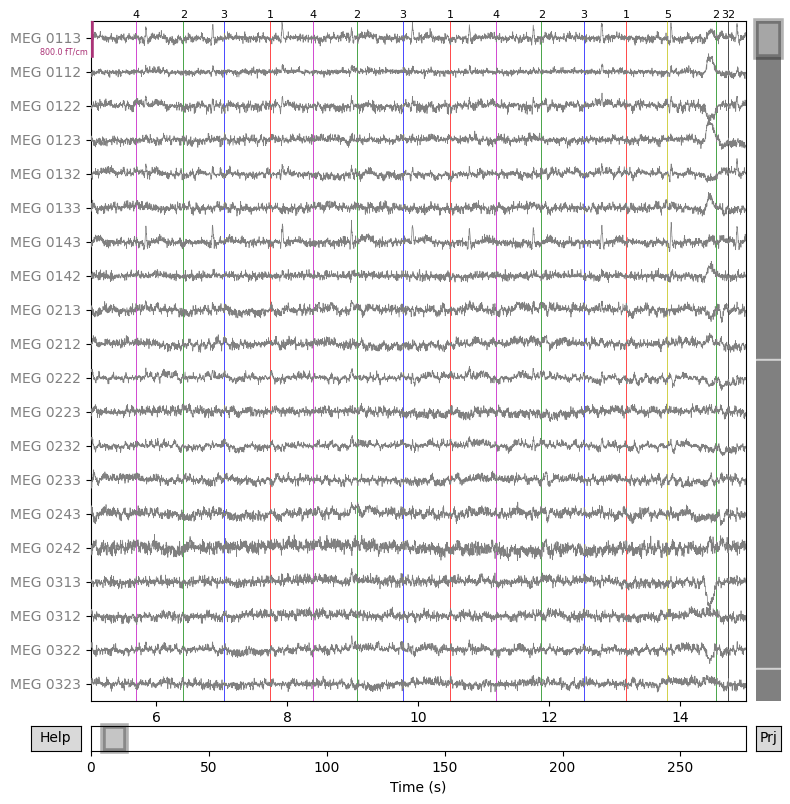

In [48]:
raw_copy7.plot(
                events=events,
                start=5,
                duration=10,
                color="gray",
                event_color={1: "r", 2: "g", 3: "b", 4: "m", 5: "y", 32: "k"}
               );

### **5.1.3 Making equally-spaced Events arrays**

In [49]:
new_events = mne.make_fixed_length_events(
                                            raw_copy7,
                                            start=5,
                                            stop=50,
                                            duration=2.0,
                                            overlap=0.5
                                         )
new_events

array([[28803,     0,     1],
       [29703,     0,     1],
       [30604,     0,     1],
       [31505,     0,     1],
       [32406,     0,     1],
       [33307,     0,     1],
       [34208,     0,     1],
       [35109,     0,     1],
       [36010,     0,     1],
       [36911,     0,     1],
       [37812,     0,     1],
       [38713,     0,     1],
       [39614,     0,     1],
       [40514,     0,     1],
       [41415,     0,     1],
       [42316,     0,     1],
       [43217,     0,     1],
       [44118,     0,     1],
       [45019,     0,     1],
       [45920,     0,     1],
       [46821,     0,     1],
       [47722,     0,     1],
       [48623,     0,     1],
       [49524,     0,     1],
       [50425,     0,     1],
       [51326,     0,     1],
       [52226,     0,     1],
       [53127,     0,     1],
       [54028,     0,     1]])

## **5.2 Epoch/Trial**

In [50]:
raw_copy7

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>

In [51]:
# Mapping Event IDs to trial descriptors
event_dict = {
            "auditory/left": 1,
            "auditory/right": 2,
            "visual/left": 3,
            "visual/right": 4,
            "smiley": 5,
            "buttonpress": 32,
             }

In [52]:
epochs = mne.Epochs(
                    raw_copy7.pick_types(eeg=True),
                    events=events,
                    event_id=event_dict,
                    tmin=-0.3,
                    tmax=0.5
                    )

epochs = epochs.get_data()

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Not setting metadata
320 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 320 events and 481 original time points ...
0 bad epochs dropped


In [53]:
# Shape = Events, Channels, Time Points
epochs.shape

(320, 59, 481)

In [54]:
events[:, -1]

array([ 2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  5,  2,
       32,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,
        3,  1,  5, 32,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,
        3,  1,  4,  2,  3,  1,  4,  2,  5, 32,  1,  4,  2,  3,  1,  4,  2,
        3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  5, 32,  3,  1,  4,  2,
        3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  5, 32,  2,
        3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,
        5, 32,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,
        1,  4,  2,  3,  1,  4,  2,  5, 32,  1,  4,  2,  3,  1,  4,  2,  3,
        1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  5, 32,  3,  1,  4,  2,  3,
        1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  5,  2, 32,  3,
        1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  5,
       32,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,  4,  2,  3,  1,
        4,  2,  3,  1,  4

In [55]:
# Only Keep Specific Events
idx = np.isin(events[:, -1], [1, 2, 3, 4])
idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,

In [56]:
Data = epochs[idx, :, :]
Label = events[idx, -1]

# Checking Shapes
Data.shape, Label.shape

((289, 59, 481), (289,))

In [57]:
Data = raw.get_data()

In [58]:
Data.shape

(376, 166800)

In [59]:
type(Data)

numpy.ndarray

Everything is ready to start!

# **6. More Useful Links**
1. [**MNE Official Tutorials**](https://mne.tools/stable/auto_tutorials/stats-sensor-space/index.html)

2. [**Make figures more publication ready**](https://mne.tools/stable/auto_tutorials/visualization/10_publication_figure.html#sphx-glr-auto-tutorials-visualization-10-publication-figure-py)